In [36]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [37]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [38]:
import matplotlib.pyplot as plt

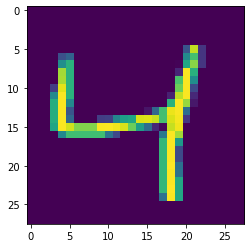

In [39]:
plt.imshow(X_train[2])

In [40]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [41]:
X_test.shape

(10000, 28, 28)

In [42]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Scaling

In [44]:
X_train = X_train/255
X_test = X_test/255

In [45]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## MODEL BUILDING 

In [46]:
model = Sequential()

In [47]:
model.add(Flatten(input_shape=(28,28)))

In [48]:
model.add(Dense(128,activation = 'relu'))
model.add(Dense(10,activation ='softmax'))

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [63]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [64]:
model.fit(X_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0995 - val_accuracy: 0.9753
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9967 - val_loss: 0.0961 - val_accuracy: 0.9775
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.1014 - val_accuracy: 0.9757
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0077 - accuracy: 0.9979 - val_loss: 0.1174 - val_accuracy: 0.9766
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0078 - accuracy: 0.9978 - val_loss: 0.1092 - val_accuracy: 0.9751
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0074 - accuracy: 0.9979 - val_loss: 0.1156 - val_accuracy: 0.9756
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.1216 - val_accuracy:

In [56]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [62]:
 y_pred.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9779

## PROCESS 
1. data preprocessing and traintest split
2. create an object for neural network 
3. add layers with activation functions
4. compile paramenters are loss function , optimizer 
5. fit the model with test data ,epochs,validation_split size
6. predict 